__Feature Engineering__

Most variables in a data set can be classified into one of two major types:

- **Numerical variables** 
- **Categorical variables**


In [2]:
# manipulating dataframes
import pandas as pd
import numpy as np

# visualizing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Load Titanic Dataset

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
titanic = pd.read_csv('E:/KaggleDataSet/Titanic/all/train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Numerical Discrete**: PassengerId, SibSp,Parch  
**Numerical Continuous**: Fare  
**Categorical Nominal**: Name, Sex, Ticket,Embarked, Survived  
**Categorical Ordinal**: Pclass, Cabin  

In [4]:
titanic.shape

(891, 12)

## Explore and Visualize Dataset

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Identify any patterns or insights**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E4273EF98>,
      dtype=object)

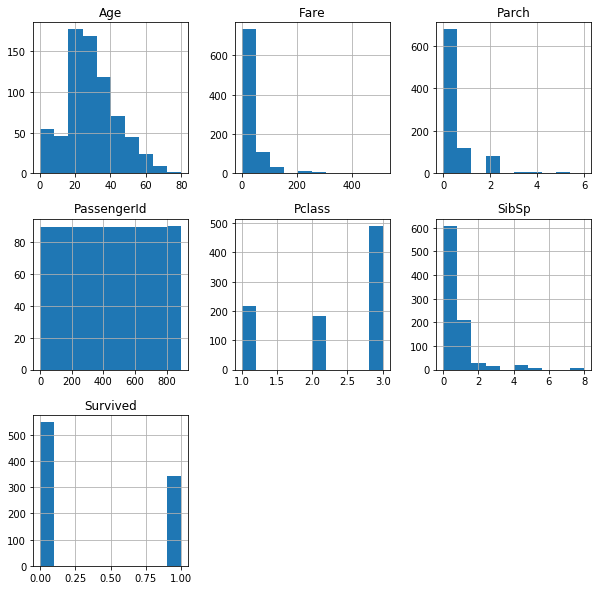

In [9]:
titanic.hist(figsize=(10,10))

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#titanic.isnull().mean
titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Missing data Not At Random (MNAR): Systematic missing values

In this dataset, both the missing values of the variables Cabin and Age, were introduced systematically. For many of the people who did not survive, the **age** they had or the **cabin** they were staying in, could not be established. The people who survived could be asked for that information.

In [12]:
# we create a dummy variable that indicates whether the value
# of the variable cabin is missing

titanic['cabin_null'] = np.where(titanic.Cabin.isnull(), 1, 0)

# find percentage of null values
titanic.cabin_null.mean()

0.7710437710437711

In [13]:
# and then we evaluate the mean of the missing values in
# cabin for the people who survived vs the non-survivors.

# group data by Survived vs Non-Survived
# and find nulls for cabin
titanic.groupby(['Survived'])['cabin_null'].mean()


Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Missing data Completely At Random (MCAR)

In the titanic dataset, there were also missing values for the variable Embarked, let's have a look.

here does not seem to be an indication that the missing information in the variable Embarked is depending on any other variable, and the fact that these women survived, means that they could have been asked for this information.

In [12]:
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


### Place holder for you to research on Missing data At Random (MAR).
Data point missing in one variable depends on the value entered on the other variable.

# Imputing Missing Values
#### How do we impute age?

How should we impute the missing age of the passengers? Do we use the mean? or the median?

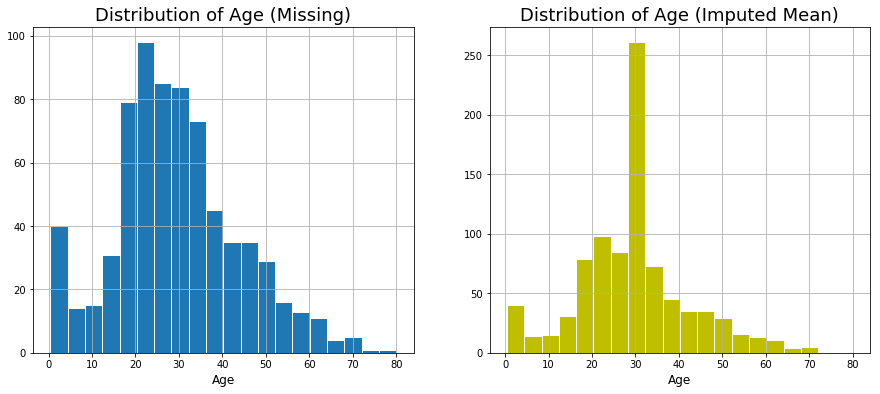

In [14]:
# Plot Distribution of Age (Missing)
plt.subplot(1, 2, 1)
titanic['Age'].hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Missing)', fontsize=18)

# Plot Distribution of Age (Imputed Mean)
plt.subplot(1, 2, 2)
mean_age = pd.DataFrame(titanic['Age'].fillna(titanic.Age.mean()))
mean_age['Age'].hist(bins=20, figsize=(15,6), edgecolor='white', color='y')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Imputed Mean)', fontsize=18)

plt.show()

In [15]:
def title(x):
    if 'Mr.' in x:
        return 'Mr'
    elif 'Mrs.' in x:
        return 'Mrs'
    elif 'Master' in x:
        return 'Master'
    elif 'Miss.' in x:
        return 'Miss'
    else:
        return 'Other'

In [16]:
# feature for the title of each person
titanic['Title'] = titanic['Name'].apply(title)

titanic['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

Text(0,0.5,'Age')

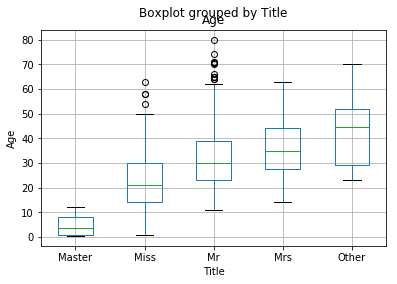

In [17]:
titanic.boxplot(column='Age',by='Title') #Mean Age is different per title
plt.ylabel('Age')

In [18]:
titanic.groupby(['Title'])['Age'].median()

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Other     44.5
Name: Age, dtype: float64

In [19]:
# Fill in the missing age with the median of their Titles
titanic['Age'].fillna(titanic.groupby(["Title"])["Age"].transform(np.median),inplace=True)

Text(0.5,1,'Distribution of Age (Imputed by Title)')

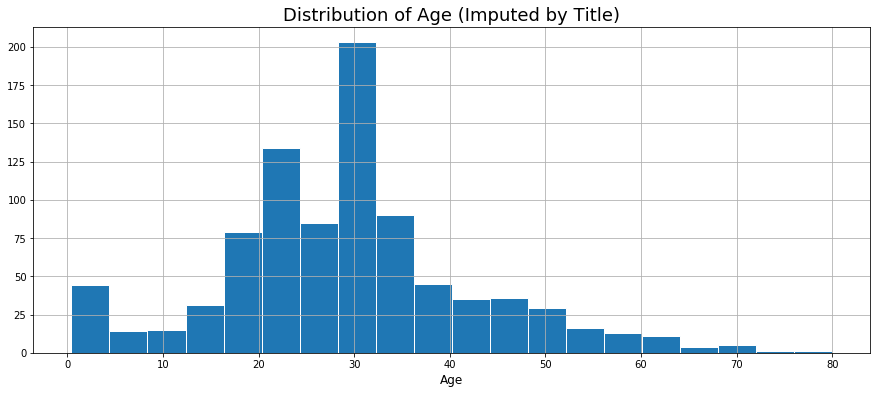

In [20]:
titanic['Age'].hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Imputed by Title)', fontsize=18)

### Data Imputation (2): Embarked

We have two missing values for Embarked. Let's impute it with the most occuring embarked station (S)

In [21]:
titanic.Embarked.value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0])

## Data Imputation: Cabin

In [23]:
titanic.Cabin.isnull().sum() / len(titanic)

0.7710437710437711

In [22]:
titanic.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_null,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,Mrs


**Interaction Features**     
Interaction features may be generated for free in tree-based models (e.g. based on tree splits of your data)

Linear Models, on the other hand, need explicit creation of these interaction features.

In [23]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

**Examine distribution of passenger family size**: Notice how there's A LOT of single riders.

Text(0,0.5,'Frequency')

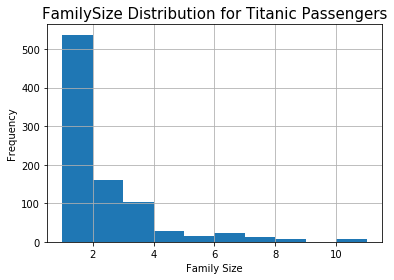

In [26]:
titanic.FamilySize.hist()
plt.title('FamilySize Distribution for Titanic Passengers', size=15)
plt.xlabel("Family Size")
plt.ylabel('Frequency')

## Dealing with Counts
***
### a. Binarization
Raw family size may not be a **robust** measurement. 

With domain knowledge, we can say that passengers are broken up into two family sizes: 
1. Traveling Alone 
2. Traveling with Family

**Create new feature: "IsAlone"**

In [27]:
titanic['IsAlone'] = titanic['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
titanic.IsAlone.value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Text(0,0.5,'Frequency')

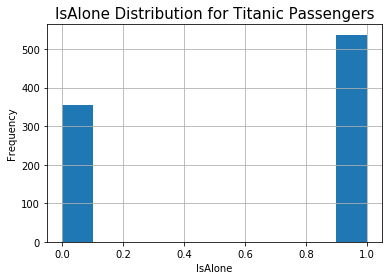

In [37]:
titanic.IsAlone.hist()
plt.title('IsAlone Distribution for Titanic Passengers', size=15)
plt.xlabel("IsAlone")
plt.ylabel('Frequency')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    titanic[['Age', 'Fare']].fillna(0),
    titanic.Survived,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [39]:

# call model
logit = LogisticRegression(random_state=44)

# train model
logit.fit(X_train, y_train)

# make predicion on test set
pred = logit.predict_proba(X_test)

print('LogReg Accuracy: {}'.format(logit.score(X_test, y_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

LogReg Accuracy: 0.6977611940298507
LogReg roc-auc: 0.7393154761904762
